# Handling class imbalances

Because of class imabalance in our dataset (specifically, our in target varaible "Loan status", where 74% of the loan status is fully paid and 26% are charged off), we need to handle this class imbalance issue before modeling.

Some ways to handle class imabalnce :
1. SMOTE : Synthetic Minority Over-sampling Technique. 
2. EditedNearestNeighbours : removing samples close to the decision boundary.
3. SMOTEENN : Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours.

We will first plot the base model of each of the four classifiers ( Decision Tree, Logistic Regression, Naive Bayes, Support Vector Machine) , and then apply the 3 class imabalnce methods to these classifiers.

After that we will check the metrics of each model and decide on the best class imabalance method to use.

In [1]:
#load all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.tree import export_graphviz
import pydotplus 
from IPython.display import Image
from six import StringIO

from sklearn.tree import DecisionTreeClassifier



from sklearn.metrics import confusion_matrix
from sklearn import metrics

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

## Classifier 1: Decision Tree

0. Base model

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
#Load data

df = pd.read_excel("/content/drive/MyDrive/IS460/credit_train_cleaned.xlsx")

y= df["Loan Status"]
X = df.drop(["Loan Status"],axis=1)

In [9]:
#Standardising with Robust Scaler-- robust to outliers
robScaler = RobustScaler()
scaled = robScaler.fit_transform(df.to_numpy())
scaled_df = pd.DataFrame(scaled, columns = df.columns)

#scaled_df.head(5)

y.unique() #array([1, 0], dtype=int64)

array([1, 0])

In [10]:
# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                          stratify = y,random_state = 1)

In [11]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth = 3, random_state= 1)

In [12]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [13]:
y_pred = dt.predict(X_test)

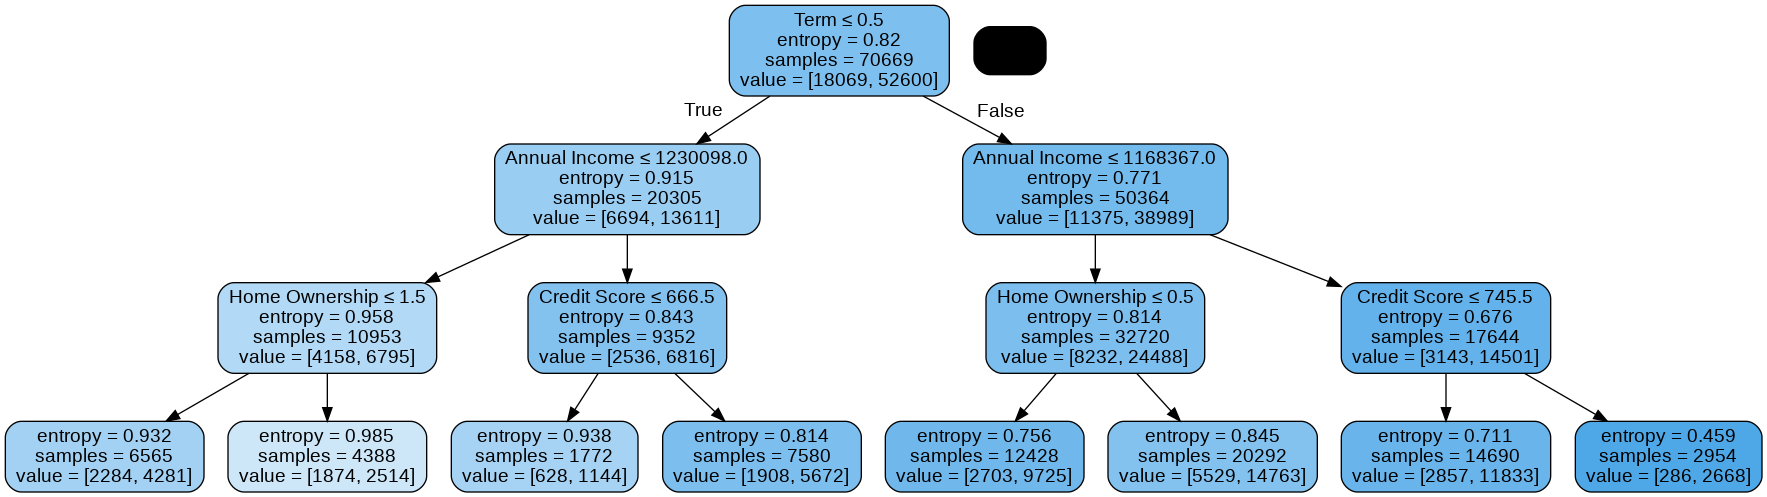

In [14]:
feature_cols = X.columns

dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DtreeLoan.png') 
Image(graph.create_png())

In [ ]:
#Accuracy, Precision, Recall and F1
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f_measure = metrics.f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f_measure)


In [15]:
from sklearn.metrics import classification_report

class_labels = ["Charged off","Fully paid"]
print(classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

 Charged off       0.00      0.00      0.00      4518
  Fully paid       0.74      1.00      0.85     13150

    accuracy                           0.74     17668
   macro avg       0.37      0.50      0.43     17668
weighted avg       0.55      0.74      0.64     17668



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
#Print out confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels = [0,1])
print(cnf_matrix)

[[    0  4518]
 [    0 13150]]


In [17]:
#Get the AUC ROC score
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)
# model will classify a random positive example higher than a random negative example 50% (0.5) of the time. 
# Poor model

0.5

1. SMOTE

In [20]:
#Load data

#df = pd.read_csv("C:/Users/65828/Desktop/SMU/Y4S2/IS460 Machine Learning and Appln/Project/23 Sept/encoded_df.csv")

y= df["Loan Status"]
X = df.drop(["Loan Status"],axis=1)

#Standardising with Robust Scaler-- robust to outliers
robScaler = RobustScaler()
scaled = robScaler.fit_transform(df.to_numpy())
scaled_df = pd.DataFrame(scaled, columns = df.columns)

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                          stratify = y,random_state = 1)

In [21]:
#SMOTE oversampling on DT classifier
print(Counter(y_train))

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(Counter(y_resampled)) 
#Counter of classes after oversampling is now more balanced than before

Counter({1: 52600, 0: 18069})
Counter({1: 52600, 0: 52600})


In [22]:
#Initialise base DT classifier
dt_1 = DecisionTreeClassifier(criterion="entropy",max_depth = 3, random_state= 1)

#Train model with resampled data
dt_1.fit(X_resampled, y_resampled)

#get predictions and compare results
y_pred_1 = dt_1.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

class_labels = ["Charged off","Fully paid"]
print(classification_report(y_test, y_pred_1, target_names=class_labels))

              precision    recall  f1-score   support

 Charged off       0.33      0.34      0.34      4518
  Fully paid       0.77      0.76      0.77     13150

    accuracy                           0.66     17668
   macro avg       0.55      0.55      0.55     17668
weighted avg       0.66      0.66      0.66     17668



In [24]:
#Accuracy, Precision, Recall and F1
accuracy = metrics.accuracy_score(y_test, y_pred_1)
precision = metrics.precision_score(y_test, y_pred_1)
recall = metrics.recall_score(y_test, y_pred_1)
f_measure = metrics.f1_score(y_test, y_pred_1)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f_measure)

Accuracy: 0.6550260357708853
Precision: 0.7709917799800261
Recall: 0.7631939163498099
F1: 0.7670730309168037


In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_1, labels = [0,1])
print(cnf_matrix)

In [ ]:
#Get the AUC ROC score
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_1, pos_label=1)
metrics.auc(fpr, tpr)
#Slight improvement from before

2. ENN

In [26]:
#Load data

#df = pd.read_csv("C:/Users/65828/Desktop/SMU/Y4S2/IS460 Machine Learning and Appln/Project/23 Sept/encoded_df.csv")

y= df["Loan Status"]
X = df.drop(["Loan Status"],axis=1)

#Standardising with Robust Scaler-- robust to outliers
robScaler = RobustScaler()
scaled = robScaler.fit_transform(df.to_numpy())
scaled_df = pd.DataFrame(scaled, columns = df.columns)

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                          stratify = y,random_state = 1)

In [27]:
#ENN undersampling on DT classifier
print(Counter(y_train))

enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_train, y_train)

print(Counter(y_resampled))
#Counter of classes after oversampling is now more balanced than before

Counter({1: 52600, 0: 18069})
Counter({1: 24088, 0: 18069})


In [28]:
#Initialise base DT classifier
dt_2 = DecisionTreeClassifier(criterion="entropy",max_depth = 3, random_state= 1)

#Train model with resampled data
dt_2.fit(X_resampled, y_resampled)

#get predictions and compare results
y_pred_2 = dt_2.predict(X_test)

In [35]:
#Accuracy, Precision, Recall and F1
accuracy = metrics.accuracy_score(y_test, y_pred_2)
precision = metrics.precision_score(y_test, y_pred_2)
recall = metrics.recall_score(y_test, y_pred_2)
f_measure = metrics.f1_score(y_test, y_pred_2)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f_measure)

Accuracy: 0.6401969662666969
Precision: 0.7758466661252335
Recall: 0.7264638783269962
F1: 0.7503436358638024


In [36]:
from sklearn.metrics import classification_report

class_labels = ["Charged off","Fully paid"]
print(classification_report(y_test, y_pred_2, target_names=class_labels))

              precision    recall  f1-score   support

 Charged off       0.33      0.39      0.36      4518
  Fully paid       0.78      0.73      0.75     13150

    accuracy                           0.64     17668
   macro avg       0.55      0.56      0.55     17668
weighted avg       0.66      0.64      0.65     17668



In [ ]:
from sklearn.metrics import classification_report

class_labels = ["Charged off","Fully paid"]
print(classification_report(y_test, y_pred_2, target_names=class_labels))

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_2, labels = [0,1])
print(cnf_matrix)

In [ ]:
#Get the AUC ROC score
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_2, pos_label=1)
metrics.auc(fpr, tpr)
#This ENN undersampling is slightly worse than SMOTE oversampling

3. SMOTEENN

In [31]:
#Load data

#df = pd.read_csv("C:/Users/65828/Desktop/SMU/Y4S2/IS460 Machine Learning and Appln/Project/23 Sept/encoded_df.csv")

y= df["Loan Status"]
X = df.drop(["Loan Status"],axis=1)

#Standardising with Robust Scaler-- robust to outliers
robScaler = RobustScaler()
scaled = robScaler.fit_transform(df.to_numpy())
scaled_df = pd.DataFrame(scaled, columns = df.columns)

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                          stratify = y,random_state = 1)

In [32]:
#SMOTE-EEN resampling
print(Counter(y_train))
smoteenn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({1: 52600, 0: 18069})


Counter({0: 34993, 1: 20543})

In [33]:
#Initialise base DT classifier
dt_3 = DecisionTreeClassifier(criterion="entropy",max_depth = 3, random_state= 1)

#Train model with resampled data
dt_3.fit(X_resampled, y_resampled)

#get predictions and compare results
y_pred_3 = dt_3.predict(X_test)

In [ ]:
#Accuracy, Precision, Recall and F1
accuracy = metrics.accuracy_score(y_test, y_pred_3)
precision = metrics.precision_score(y_test, y_pred_3)
recall = metrics.recall_score(y_test, y_pred_3)
f_measure = metrics.f1_score(y_test, y_pred_3)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f_measure)

In [34]:
from sklearn.metrics import classification_report

class_labels = ["Charged off","Fully paid"]
print(classification_report(y_test, y_pred_3, target_names=class_labels))

              precision    recall  f1-score   support

 Charged off       0.29      0.68      0.40      4518
  Fully paid       0.79      0.41      0.54     13150

    accuracy                           0.48     17668
   macro avg       0.54      0.55      0.47     17668
weighted avg       0.66      0.48      0.51     17668



In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_3, labels = [0,1])
print(cnf_matrix)

In [ ]:
#Get the AUC ROC score
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_3, pos_label=1)
metrics.auc(fpr, tpr)
# worse off than SMOTE but slightly better than ENN

### SMOTE + PCA 
SMOTE seems to be the best method to handle class imbalance


In [ ]:
#Load data

df = pd.read_csv("C:/Users/65828/Desktop/SMU/Y4S2/IS460 Machine Learning and Appln/Project/23 Sept/encoded_df.csv")

y= df["Loan Status"]
X = df.drop(["Loan Status"],axis=1)

#Standardising with Robust Scaler-- robust to outliers
robScaler = RobustScaler()
scaled = robScaler.fit_transform(df.to_numpy())
scaled_df = pd.DataFrame(scaled, columns = df.columns)

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                          stratify = y,random_state = 1)

In [ ]:
#SMOTE oversampling on DT classifier
print(Counter(y_train))

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(Counter(y_resampled)) 
#Counter of classes after oversampling is now more balanced than before

In [ ]:
temp_df=pd.concat([X_resampled,X_test],axis=0)
pca=PCA(n_components=15) #PCA on all the columns (15 of them)
pca_components=pca.fit_transform(temp_df)
pca_df = pd.DataFrame(pca_components,columns=['PC' + str(x) for x in range(1, 16)])
pca_df

In [ ]:
pca.explained_variance_ratio_

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]


In [ ]:
#Plotting
plt.bar(x=range(1,16), height= per_var , tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
#Initialise base DT classifier
dt_4 = DecisionTreeClassifier(criterion="entropy",max_depth = 3, random_state= 1)

#Train model with resampled data
dt_4.fit(pca_df.iloc[:len(X_resampled),:], y_resampled)

#get predictions and compare results
y_pred_4 = dt_4.predict(pca_df.iloc[len(X_resampled):,:])

In [ ]:
#Accuracy, Precision, Recall and F1
accuracy = metrics.accuracy_score(y_test, y_pred_4)
precision = metrics.precision_score(y_test, y_pred_4)
recall = metrics.recall_score(y_test, y_pred_4)
f_measure = metrics.f1_score(y_test, y_pred_4)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f_measure)

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_4, labels = [0,1])
print(cnf_matrix)

In [ ]:
#Get the AUC ROC score
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_4, pos_label=1)
metrics.auc(fpr, tpr)

#did not do as well as SMOTE and ENN 
#Thus not using PCA